### Comparison runtimes of Decision Tree Model & Random Forest Model using  IBM HR employee attrition dataset

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

### Data Exploration & Visualization

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('HR-Employee-Attrition.csv')
df.info()
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Check for null values
display(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [3]:
numeric = df.select_dtypes(['int64']).columns
categoric =  df.select_dtypes(['object']).columns

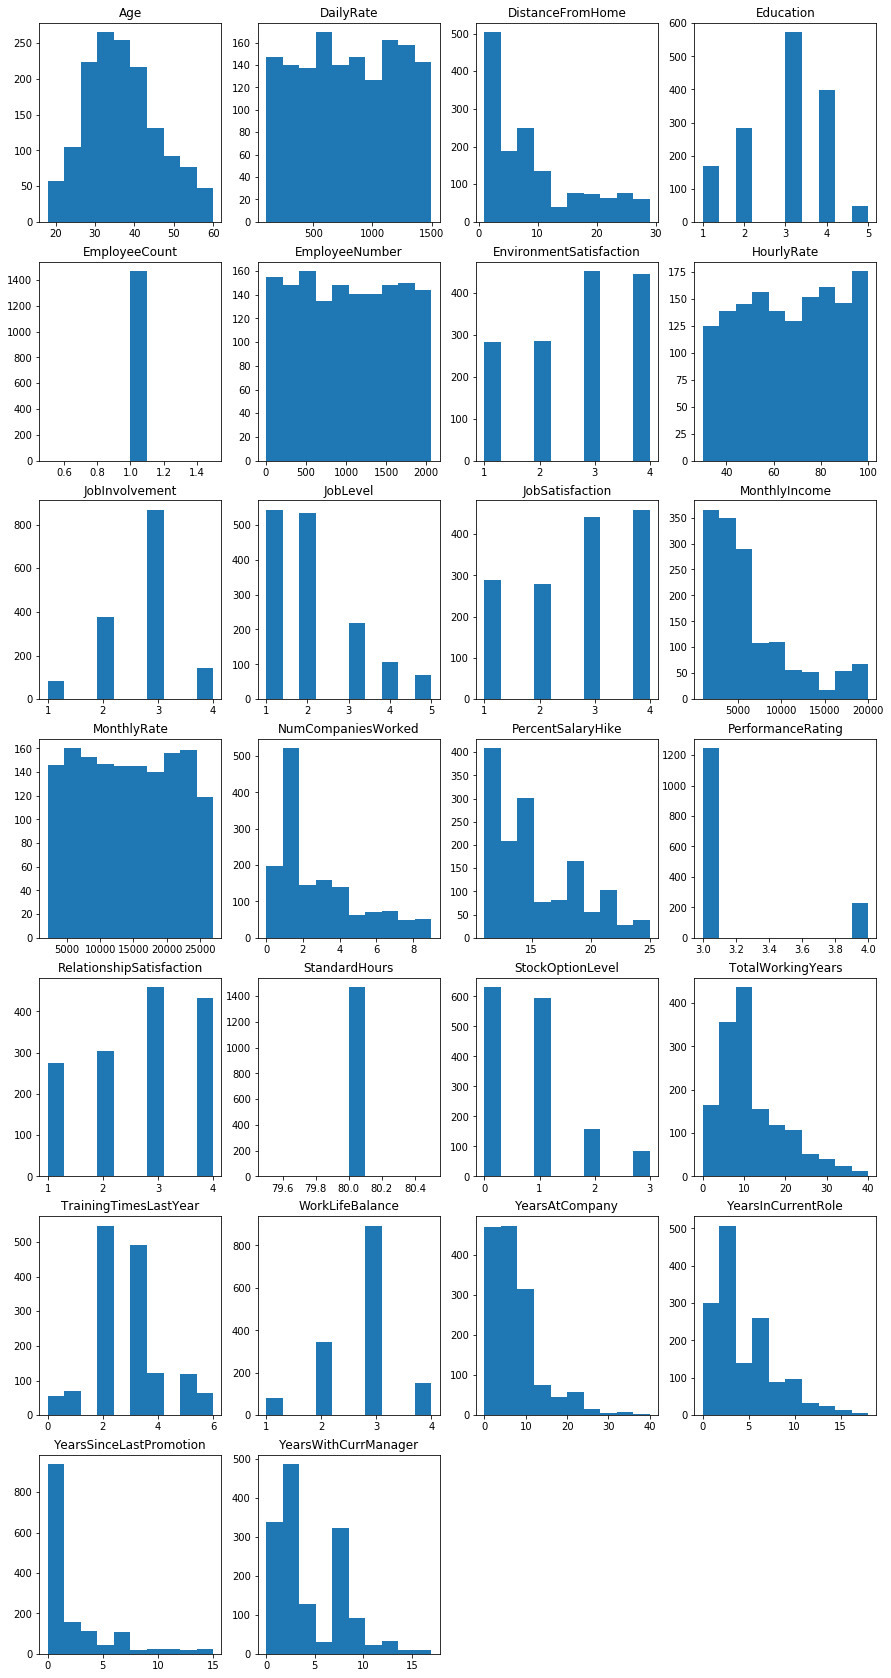

In [27]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(numeric, 1):
    plt.subplot(7, 4, i)
    plt.hist(df[col])
    plt.title(col)

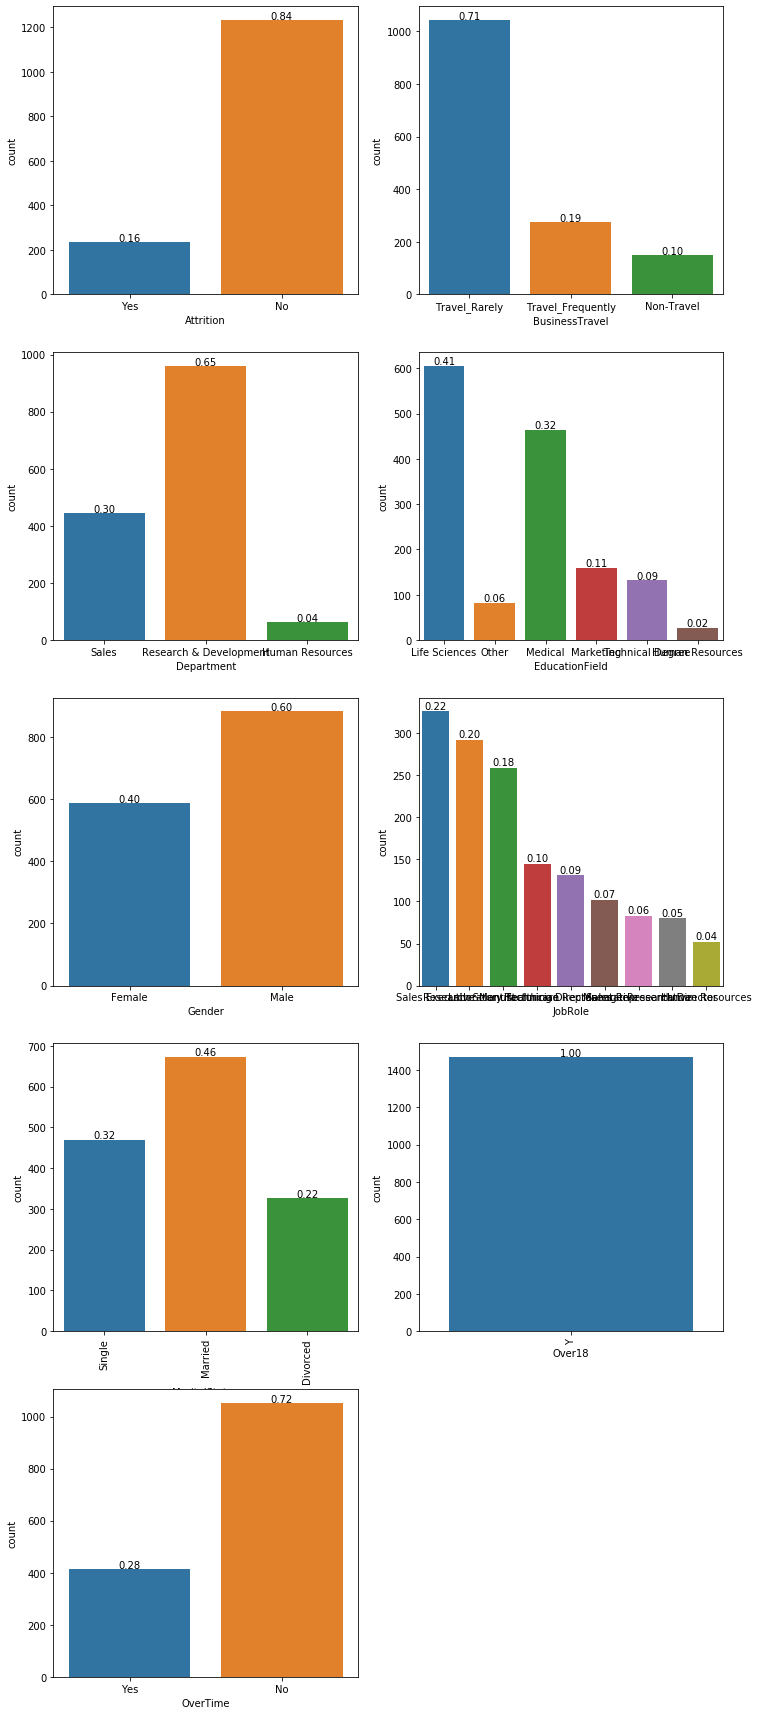

In [5]:
total_records= len(df)
plt.figure(figsize=(12,8))
j=0
for i in categoric:
    j +=1
    plt.subplot(5,2,j)
    ax1 = sns.countplot(data=df,x= i)
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

### There are no missing values and outliers. 
### Now converting categorical variables to dummy variables:

In [8]:
pd.get_dummies(df, drop_first=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
5,32,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
6,59,1324,3,3,1,10,3,81,4,1,1,2670,9964,4,20,4,1,80,3,12,3,2,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
7,30,1358,24,1,1,11,4,67,3,1,3,2693,13335,1,22,4,2,80,1,1,2,3,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
8,38,216,23,3,1,12,4,44,2,3,3,9526,8787,0,21,4,2,80,0,10,2,3,9,7,1,8,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9,36,1299,27,3,1,13,3,94,3,2,3,5237,16577,6,13,3,2,80,2,17,3,2,7,7,7,7,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [3]:
X = df.drop('Attrition', 1)
y = df['Attrition']
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

In [8]:
# Select top 10 features
test = SelectKBest(score_func= chi2,k=4)
fit = test.fit(X,y)
np.set_printoptions(precision=3)
print(fit.scores_)


[3.910e+00 7.844e-01 2.556e+00 1.982e-01       nan 2.815e-02 3.631e+00
 1.132e-02 2.423e+00 1.209e+01 3.689e+00 7.973e+00 5.628e-02 7.154e-01
 6.066e-02 1.038e-02 7.035e-01       nan 8.423e+00 5.768e+00 5.143e-01
 5.673e-01 3.553e+00 6.529e+00 5.068e-01 6.510e+00 7.318e+00 1.582e+01
 1.048e+00 3.986e-01 3.703e+00 6.694e+00 1.919e+00 9.240e-01 4.079e+00
 2.222e+00 4.446e-01 6.436e+00 7.651e-01 5.101e-01 8.293e+00 1.860e+00
 1.170e+01 9.496e+00 9.127e+00 1.098e+01 1.523e-04 4.473e-01 3.429e+01
 8.794e+00 6.598e+00 3.077e+01       nan 2.520e+01 6.385e+01]


In [32]:
def rfr_model(X, y):
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,
        n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                                n_estimators=best_params["n_estimators"],
                                random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [33]:
rfr_model(X, y)

array([-0.228, -0.205, -0.213, -0.202, -0.228, -0.24 , -0.228, -0.214,
       -0.199, -0.205])